<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ComputerVision/CascadeTabNet_Table_Detection_In_Documents_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adaptation: CascadeTabNet Demo Notebook

---

In this notebook we add some annotations and examples to the orginal CascadeTabNet Demo Notebook.

Original notebook: https://colab.research.google.com/drive/1lzjbBQsF4X2C2WZhxBJz0wFEQor7F-fv?usp=sharing

---


[![PWC](https://img.shields.io/endpoint.svg?url=https://paperswithcode.com/badge/cascadetabnet-an-approach-for-end-to-end/table-detection-on-icdar2013-1)](https://paperswithcode.com/sota/table-detection-on-icdar2013-1?p=cascadetabnet-an-approach-for-end-to-end)
[![PWC](https://img.shields.io/badge/PyTorch-v1.4-blue)](https://pytorch.org/)
[![PWC](https://img.shields.io/badge/%20mmdetection%20-v1.2-blue)](https://github.com/open-mmlab/mmdetection)

> **CascadeTabNet: An approach for end to end table detection and structure recognition from image-based documents**<br>
> [Devashish Prasad](https://github.com/DevashishPrasad),
> [Ayan Gadpal](https://github.com/ayangadpal),
> [Kshitij Kapadni](https://github.com/kshitijkapadni),
> [Manish Visave](https://github.com/ManishDV),
> <br>
> [Preprint Link of Paper](https://arxiv.org/abs/2004.12629)<br>
> <a href="results.pdf">Supplementary file</a> <br>
> The paper has been accepted at [CVPR 2020 Workshop on Text and Documents in the Deep Learning Era](https://cvpr2020text.wordpress.com/)<br>
> [Code Link](https://github.com/DevashishPrasad/CascadeTabNet)
<img align="right" src="imgs/CVPR Teaser.gif" />

## 1. Install all the prerequisite
This will take a while, Remember to **Restart Runtime** after this step is done 

In [ ]:
!pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install -q mmcv terminaltables
!git clone --branch v1.2.0 'https://github.com/open-mmlab/mmdetection.git'
%cd "mmdetection"
!pip install -r "/content/mmdetection/requirements/optional.txt"
!python setup.py install
!python setup.py develop
!pip install -r {"requirements.txt"}
!pip install pillow==6.2.1 
!pip install mmcv==0.4.3
%cd "/content"

## 2. Clone the Repository 
We will be using "ICDAR 19 (Track B2 Modern) table structure recognition" for demo

In [ ]:
!git clone https://github.com/DevashishPrasad/CascadeTabNet.git

## 3. Download the Pretrained Model



In [3]:
!gdown "https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT"

Downloading...
From: https://drive.google.com/u/0/uc?id=1-QieHkR1Q7CXuBu4fp3rYrvDG9j26eFT
To: /content/epoch_36.pth
664MB [00:03, 194MB/s]


## 4. Run the Predictions

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


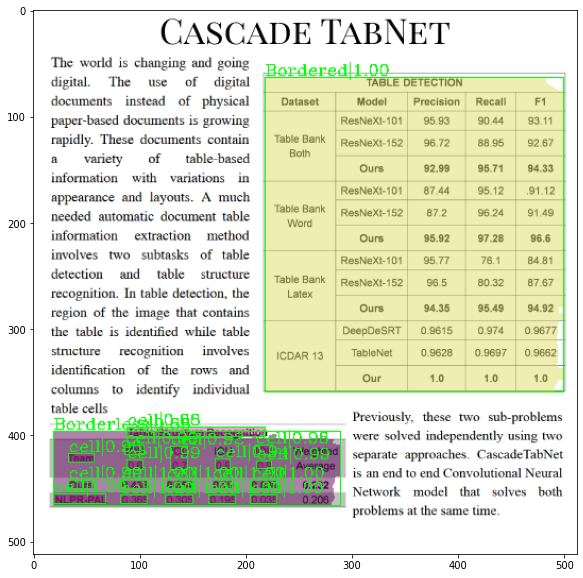

In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
# Load model
config_file = '/content/CascadeTabNet/Config/cascade_mask_rcnn_hrnetv2p_w32_20e.py'
checkpoint_file = '/content/epoch_36.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Test a single image 
img = "/content/CascadeTabNet/Demo/demo.png"

# Run Inference
result = inference_detector(model, img)

# Visualization results
classes = ('Bordered', 'cell', 'Borderless')
show_result_pyplot(img, result, classes, score_thr=0.85)

**Note :** If you are getting "no module name mmdet" error, Please Restart the runtime by pressing "Crtl+M" OR going to the runtime (5th option, top left) and selecting Restart Runtime.

After this, use TSR postprocessing for best result

## Result analyse

The detection result, can be either (bbox, segm) or just bbox (tuple[list] or list):
     

In [5]:
 if isinstance(result, tuple):
    bbox_result, segm_result = result
else:
    bbox_result, segm_result = result, None

Each position on the list represents a label prediction. For example, the first position is related to the predictions of the first label. The second position are the predictions of the second label. Etc.

In [6]:
for idx,cls in enumerate(classes):
  print(f"{idx} : {cls}")
  print(bbox_result[idx])
  print()

0 : Bordered
[[218.06602     63.34606    499.1235     359.62848      0.99998415]]

1 : cell
[[1.24599945e+02 4.56096252e+02 1.50044250e+02 4.64240143e+02
  9.97700274e-01]
 [8.29217834e+01 4.56154999e+02 1.07782349e+02 4.64239532e+02
  9.97802198e-01]
 [1.25117943e+02 4.42158661e+02 1.50015030e+02 4.50610229e+02
  9.98308182e-01]
 [1.98071747e+01 4.55575317e+02 6.80631638e+01 4.64789917e+02
  9.95660484e-01]
 [1.65513000e+02 4.56115021e+02 1.90672577e+02 4.64388947e+02
  9.97229517e-01]
 [8.31979599e+01 4.42330017e+02 1.07749634e+02 4.50538452e+02
  9.98061597e-01]
 [3.32863808e+01 4.42888977e+02 5.55910492e+01 4.50813660e+02
  9.86474037e-01]
 [8.67470474e+01 4.09841370e+02 1.04103867e+02 4.18636505e+02
  9.90532637e-01]
 [2.04940979e+02 4.56185333e+02 2.29674881e+02 4.64251831e+02
  9.96962607e-01]
 [1.68980927e+02 4.42210846e+02 1.87966049e+02 4.50470367e+02
  9.97305989e-01]
 [1.69935623e+02 4.10118774e+02 1.86738235e+02 4.19972778e+02
  8.09451342e-01]
 [2.05329453e+02 4.42208740e

BBox (ndarray): Bounding boxes (with scores), shaped (n, 4) or (n, 5). 

```python
if bboxes.shape[1] == 5
    scores = bboxes[:, -1]
```


The first 4 position of the bbox are the vertix of the segment (x0, x1, y0, y1).

In [48]:
bbox = np.array(bbox_result[0][:,:-1])[0]
bbox_int = bbox.astype(np.int32)
bbox_int

array([218,  63, 499, 359], dtype=int32)

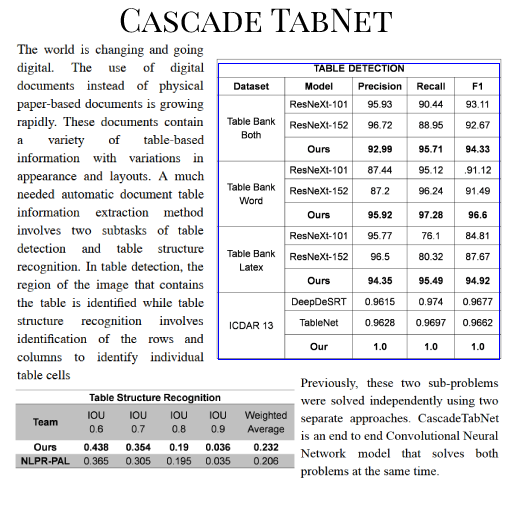

In [52]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from mmcv.image import imread


# Get the borders of the segment
x0=bbox_int[0]
y0=bbox_int[1]
x1=bbox_int[2]
y1=bbox_int[3]
left_top = (x0, y0)
right_bottom = (x1, y1)

# Draw the rectangle
pic = imread(img)
pic = np.ascontiguousarray(pic)
cv2.rectangle(pic, left_top, right_bottom, (255, 0, 0))
cv2_imshow(pic)

## Test different images

In [77]:
def execute_model(image_url):
  !wget {image_url} -q -O input.jpg
  img = "input.jpg"

  # Run Inference
  result = inference_detector(model, img)

  # Visualization results
  if np.vstack(result[0]).shape[0] > 0:
    # If not predictions it raise an exception
    show_result_pyplot(img, result, classes, score_thr=0.85)
  else:
    pic = imread(img)
    cv2_imshow(pic)

### Article

It seems that the identification is good.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


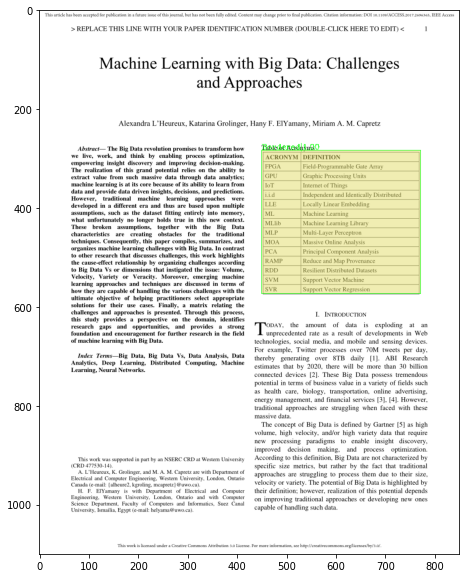

In [78]:
execute_model("https://i1.rgstatic.net/publication/316448042_Machine_Learning_With_Big_Data_Challenges_and_Approaches/links/5915a79d4585152e199f5b4f/largepreview.png")

### Economic report

It seems that the model has problems when there are graphs.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


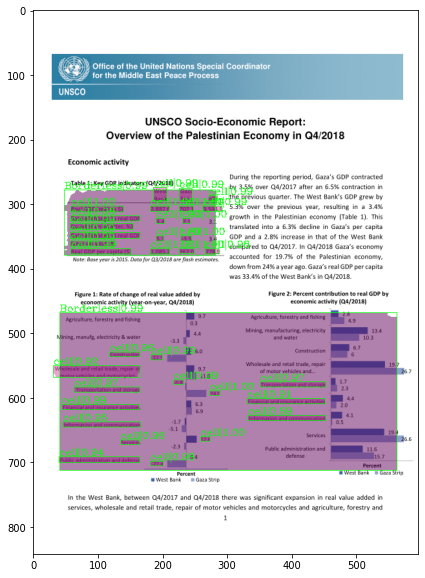

In [79]:
execute_model("https://reliefweb.int/sites/reliefweb.int/files/styles/attachment-large/public/resources-pdf-previews/1280118-unsco_socio-economic_report_q4_2018.png?itok=jqo0varR")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


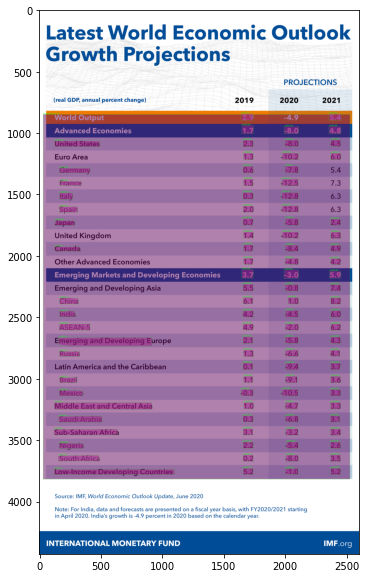

In [80]:
execute_model("https://www.imf.org/~/media/Images/IMF/Publications/WEO/2020/June/English/WEOtableJune2020.ashx?la=en")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


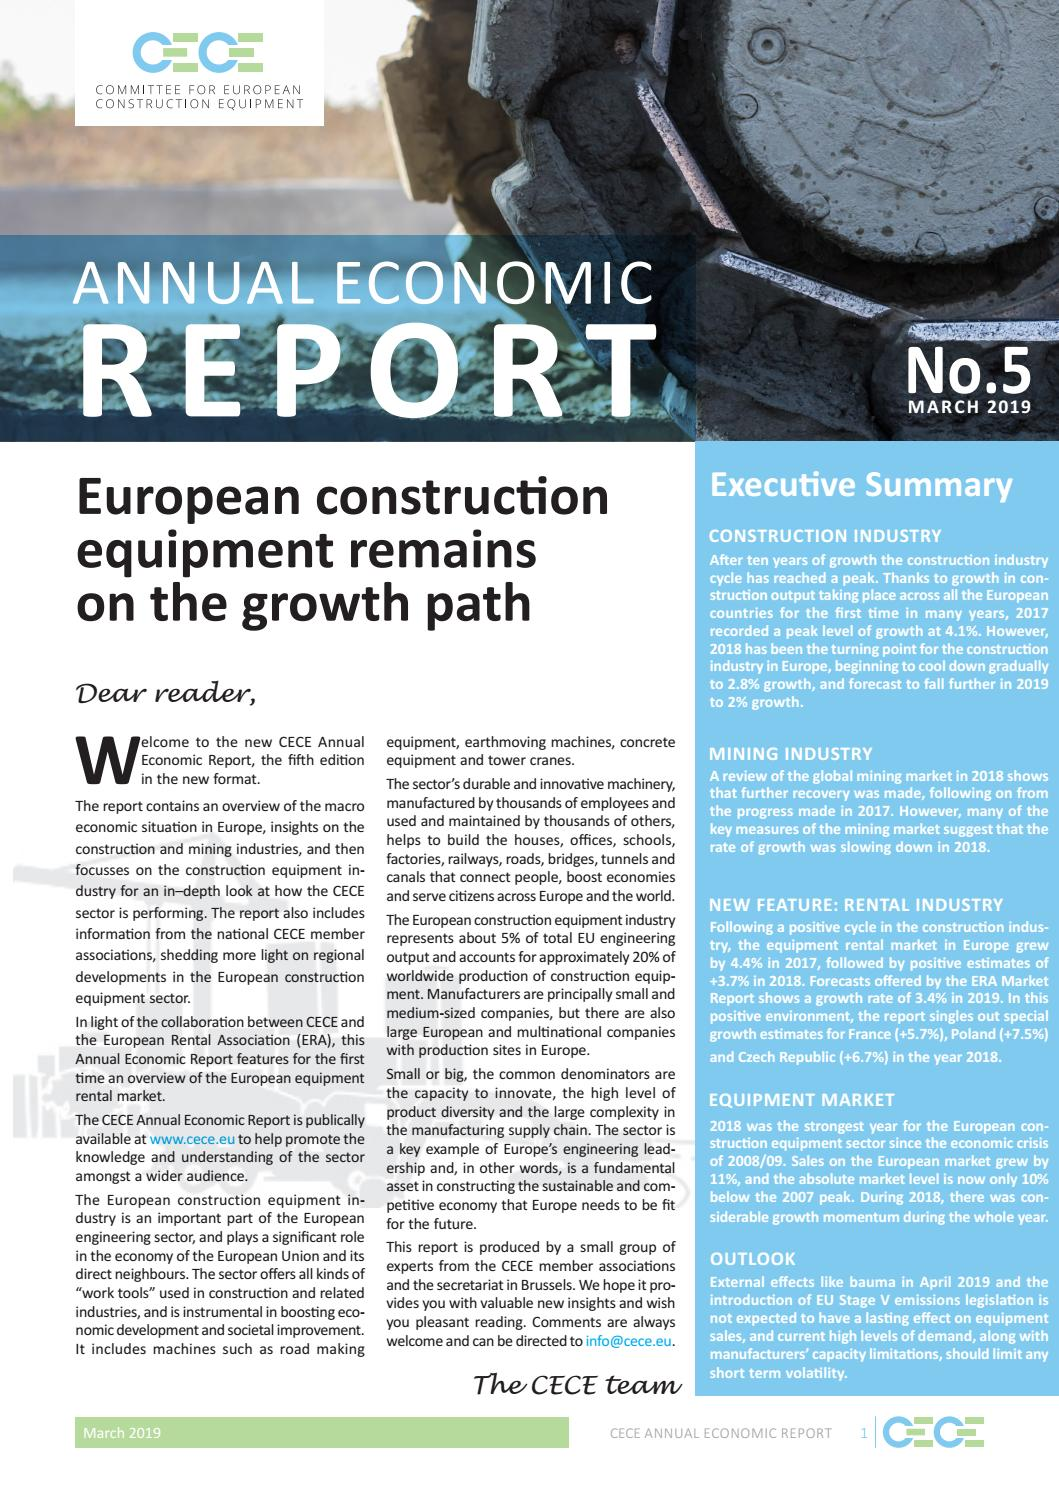

In [81]:
execute_model("https://image.isu.pub/190312133654-02f1f6f8c2ad2005ff728899a08cc220/jpg/page_1.jpg")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


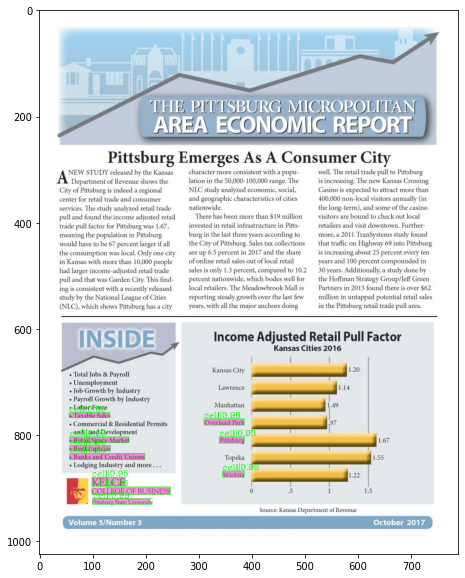

In [82]:
execute_model("https://www.pittks.org/wp-content/uploads/2017/10/Economic-Report-789x1024.jpg")

### Formal document

This kind of documents can have weird formats that are not easy to interpret for the model. But in general the result is good.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


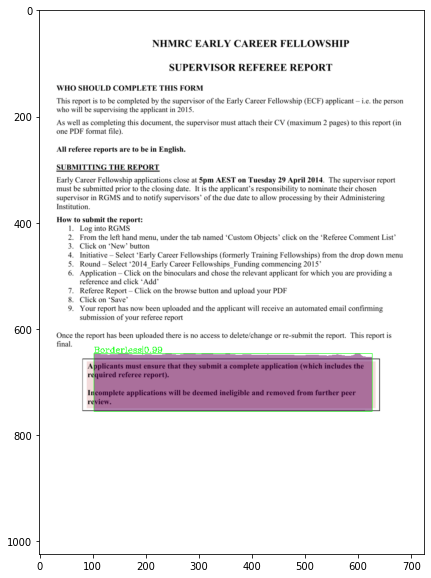

In [83]:
execute_model("https://s3.studylib.net/store/data/007541304_2-675987fc96bf8d0599973dbb03f42f86.png")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


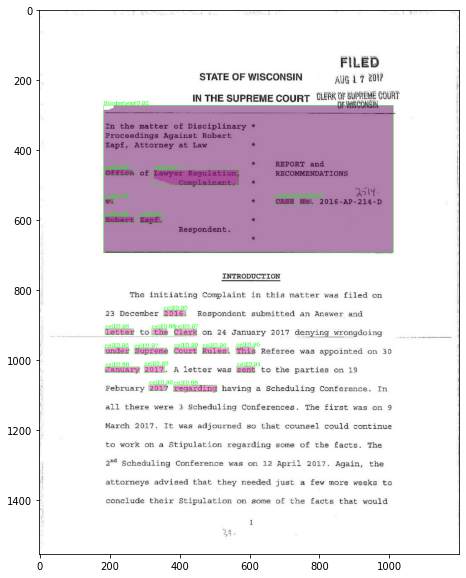

In [84]:
execute_model("https://bloximages.chicago2.vip.townnews.com/kenoshanews.com/content/tncms/assets/v3/editorial/d/24/d24cb59e-21b3-5b93-b167-f1bdc341cae6/599dc9acea8cc.preview.jpg?resize=1200%2C1554")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


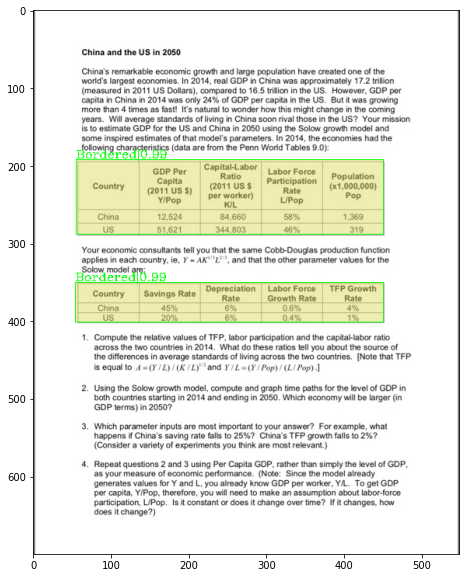

In [86]:
execute_model("https://media.cheggcdn.com/study/1a9/1a9f409d-1e27-4f10-bb55-d89124b8b923/image.png")

### Invoices


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


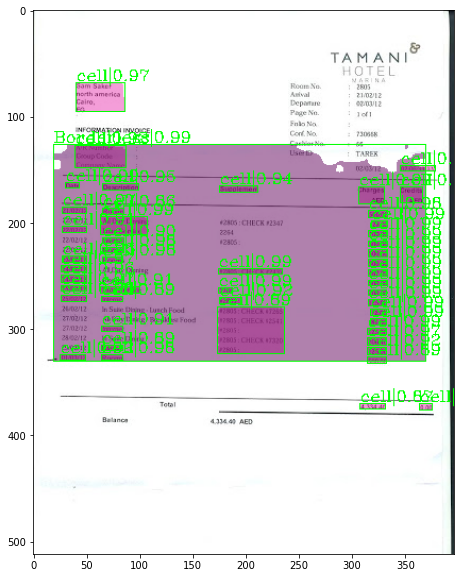

In [87]:
execute_model("https://lh3.googleusercontent.com/proxy/URTPy8Jcr0DcP_vGedP8MaW-4y2-mw4IPLFwmRIq0WSG4CaZDRAlFiy0yfD6BEbdlHawa3p9by4kOcLhOUmf3RhvNxs84Pgc1jdmrZNiGb9dDASX6z_spXSfxGiQYsbXlzVTJeDqLl8GiPWZU0hWbiAz5kLT7SBGkeUdwt-mDwG9cyN0JC9J9X91dSVKILuCz4vjzmh0uKtiWm5PO8wHDn2IkWy9sPH6W5qHR7fYreJkP5FPypQnmt2h2kpIrnGgWcKENaYeMnlbJwruL5r9lTWOmG09Rfut1A")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


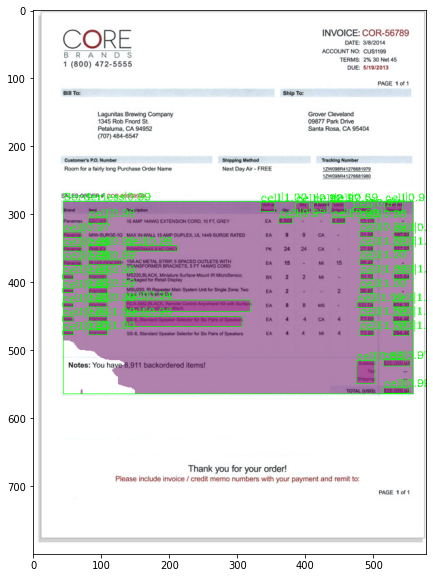

In [88]:
execute_model("https://www.philipwilliamson.com/wp-content/uploads/2016/07/invoice-scan-adjust.jpg"

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


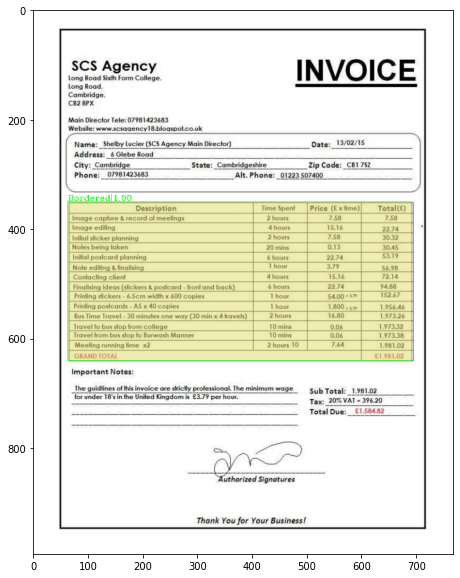

In [89]:
execute_model("https://cdn.slidesharecdn.com/ss_thumbnails/invoiceworddocumnet-150614130647-lva1-app6892-thumbnail-4.jpg?cb=1434287293")

### Scanned documents

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


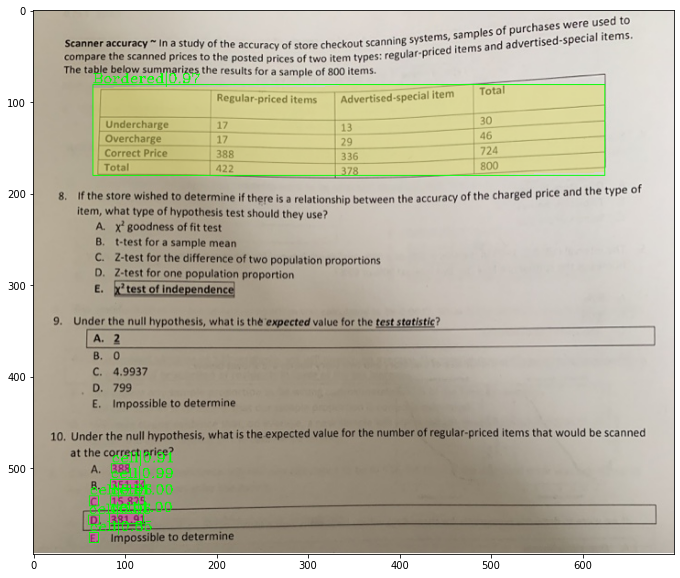

In [90]:
execute_model("https://media.cheggcdn.com/study/8d0/8d0649c2-6d64-4d59-9682-8deff5c6fe4b/image.png")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


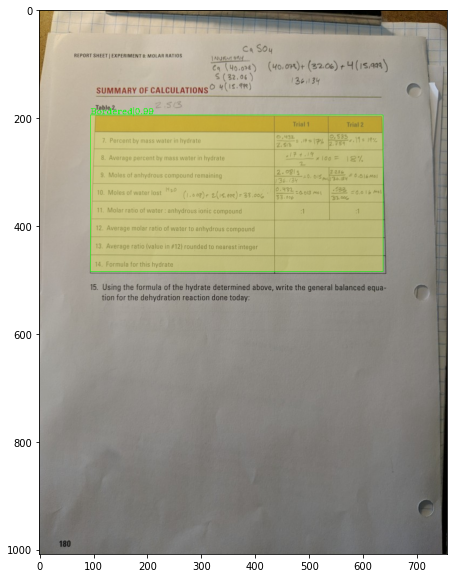

In [91]:
execute_model("https://media.cheggcdn.com/media/acd/acd37fba-e7e7-4cfc-a806-a8ed7f5daa26/image.png")

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


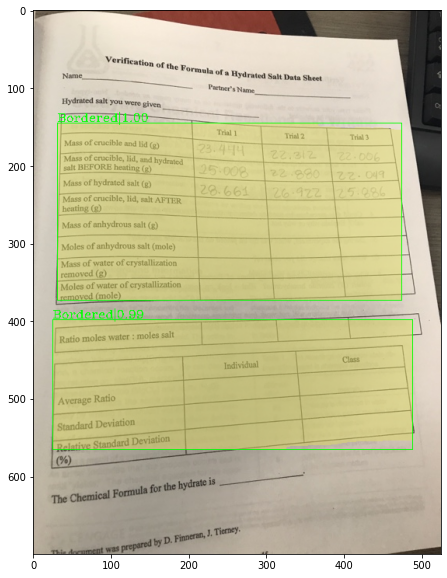

In [92]:
execute_model("https://media.cheggcdn.com/media%2Fd0e%2Fd0ed47b5-192d-42c1-8388-33ed7c6f80ba%2Fimage")